In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
import seaborn as sns
#natural Language Toolkit
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#Data Analyzing and Vizualization


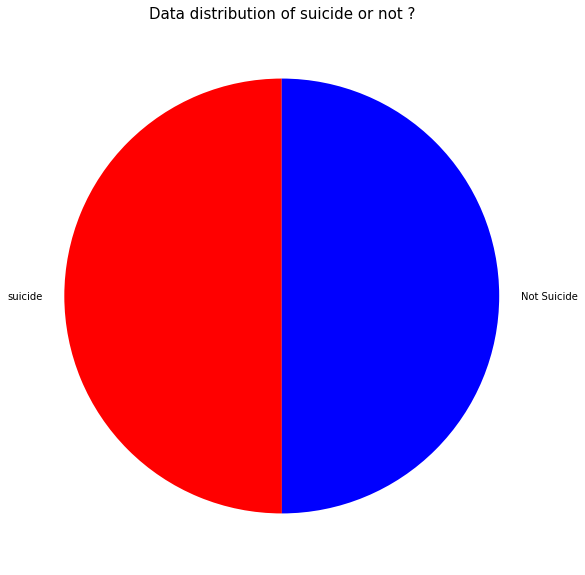

In [ ]:
#removing unneccessary columns
suicide_data=pd.read_csv('/content/drive/MyDrive/Suicide_Detection.csv')
suicide_data=suicide_data.sample(n=10000)
suicide_data=suicide_data.iloc[:,1:3]
suicide_data.iloc[1,0]
# print(suicide_data['class'].value_counts())
plt.figure(figsize=(12,10))
plt.pie(suicide_data['class'].value_counts(),startangle=90,colors=['#FF0000','#0000FF'],labels=['suicide','Not Suicide'])
plt.title('Data distribution of suicide or not ?',fontdict={'size':15})
plt.show()

# Preprocessing Dataset


In [ ]:
#stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#regex module
import re
#lemmatizer for lemmatizing the words
lemmatizer=WordNetLemmatizer()
All_stopwords=stopwords.words('english')

print("\nDataset Before Preprocessing : \n")
print(suicide_data.iloc[:10,:])
print("\nStopwords removed are : \n",All_stopwords)
for index,row in suicide_data.iterrows():
  filtered_post="";
  post=row['text']
  post=re.sub(r'[^\w\s]','',str(post))
  words_in_post=nltk.word_tokenize(post)
  final_words=[]
  # words_in_post=[w for w in words_in_post if not w in All_stopwords]
  for word in words_in_post:
    if word not in All_stopwords:
      final_words.append(word)
  for word in final_words:
    filtered_post= filtered_post + "  " + (lemmatizer.lemmatize(word))
  if len(filtered_post) == 0:
    suicide_data.loc[index,'text']="NaN"
  else:
    suicide_data.loc[index,'text']=filtered_post.lower()

print("\nDataset After Preprocessing : ")
print(suicide_data.iloc[:10,:]) 



Dataset Before Preprocessing : 

                                                     text        class
192150    relationship  scam  just  stay  single  worr...  non-suicide
140025    gayest  name  ever  u  think  gayest  name  ...  non-suicide
143231    karma  whore  2  day  ago  user  name  unbru...  non-suicide
197003    how  newsim  planning  death  right  im  dec...      suicide
72618     cómo  seguir  adelantedurante  años  luchado...      suicide
8903      worst  loser  everi  sometimes  wonder  othe...      suicide
80631     i  hate  everyonei  dont  find  joy  anythin...      suicide
201452    go  away  im  listening  playlist  made  ful...  non-suicide
162762    no  one  take  seriouslyfuck  subreddit  it ...      suicide
225745    helpmy  friend  posted  note  private  insta...      suicide

Stopwords removed are : 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', '

# Data Spliting and using countvectorizer

No of features extracted  :  12610


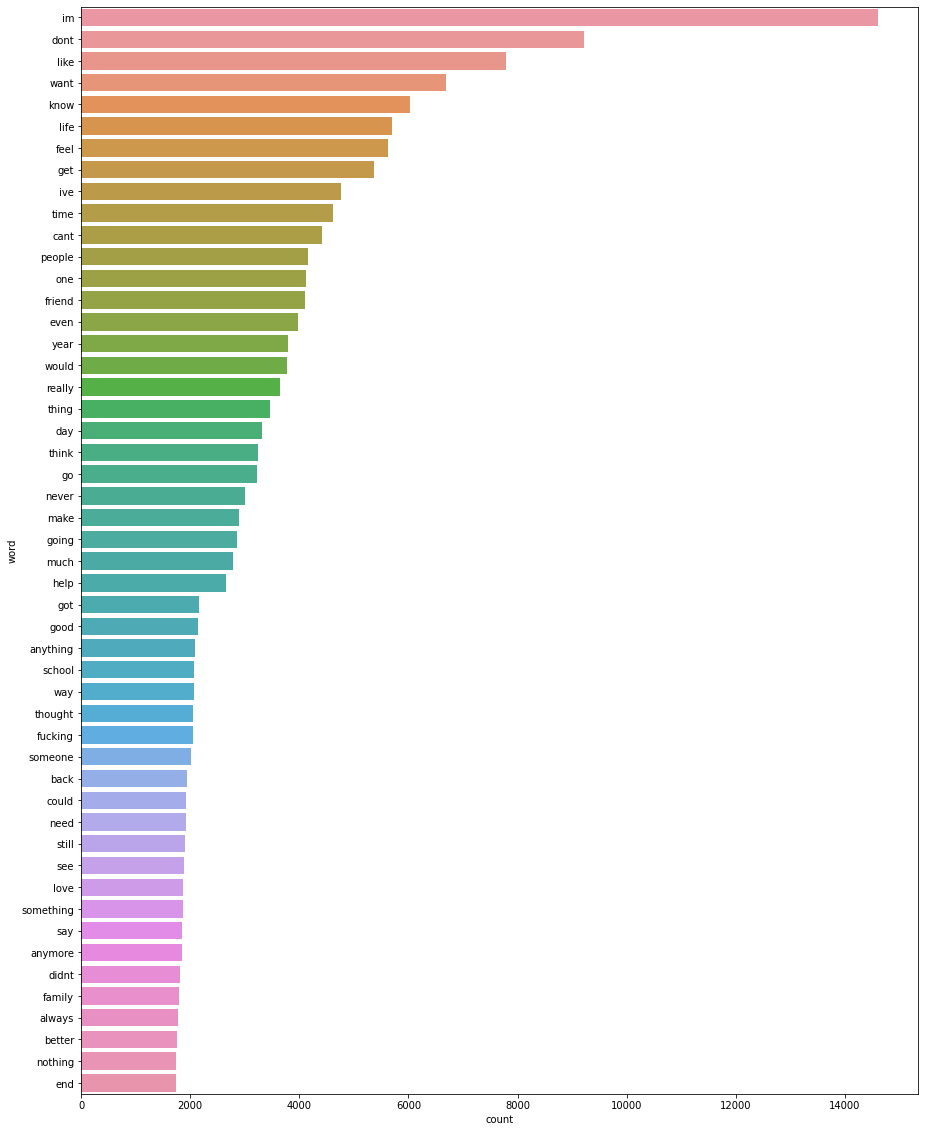

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
X=suicide_data['text']
Y=suicide_data['class']
#instaniting the count_vect
count_vect=CountVectorizer(min_df=2)
X_matrix=count_vect.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_matrix,Y,test_size=0.3, random_state=42)
print("No of features extracted  : ",count_vect.get_feature_names_out().shape[0])
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)
word_freq=pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)
plt.figure(figsize=(15,20))
sns.barplot(x='count',y='word',data=word_freq.iloc[:50])
plt.show()

#KNN

Printing the accurracy, confusion matrix and classification report for best k value : 
Confusion matrix is : 

[[1413   75]
 [ 618  894]]

Classification report is : 

              precision    recall  f1-score   support

 non-suicide       0.70      0.95      0.80      1488
     suicide       0.92      0.59      0.72      1512

    accuracy                           0.77      3000
   macro avg       0.81      0.77      0.76      3000
weighted avg       0.81      0.77      0.76      3000


Accuracy is : 

0.769


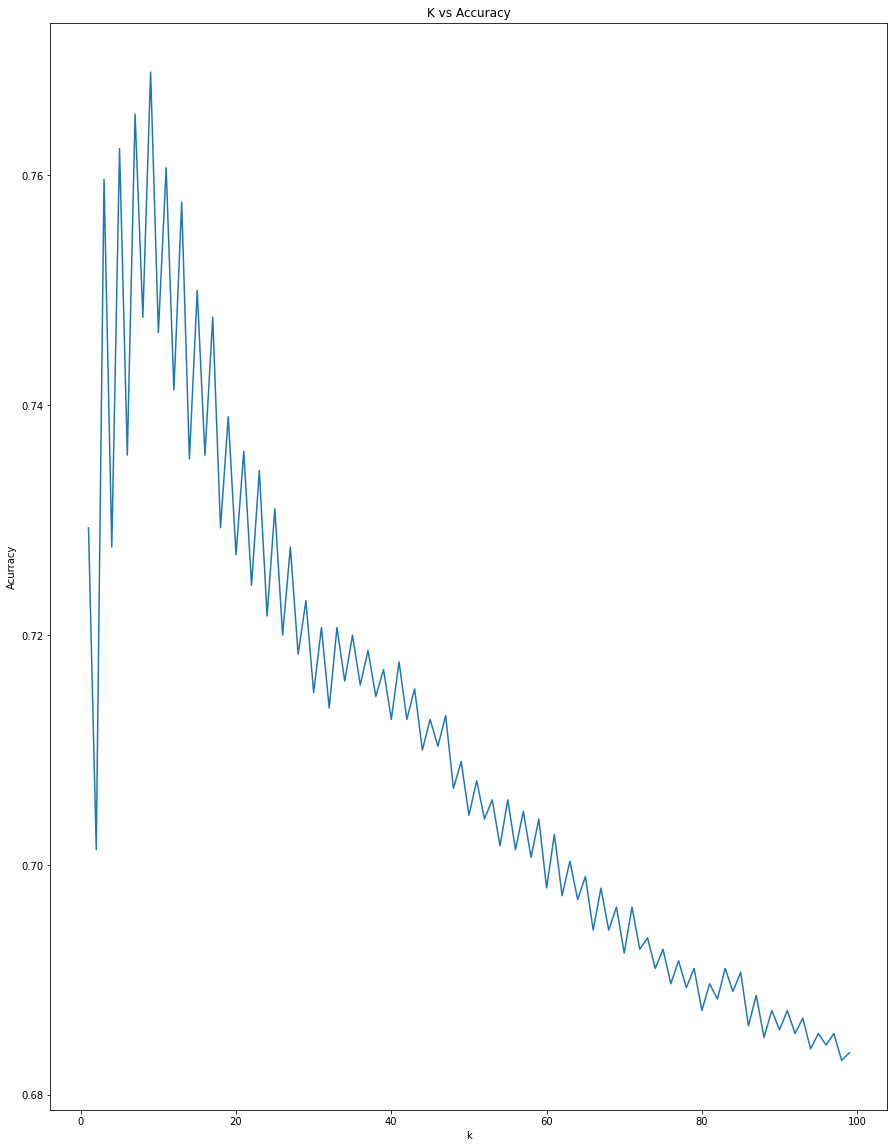

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores=[]
best_value_k=0
max_accuracy=0
k=[]
for i in range(1,100):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  class_predicted=neigh.predict(X_test)
  curr_accuracy=metrics.accuracy_score(y_test,class_predicted)
  scores.append(curr_accuracy)
  k.append(i)
  if max_accuracy<curr_accuracy:
    best_value_k=i
    max_accuracy=curr_accuracy

plt.figure(figsize=(15,20))
plt.plot(k,scores)
plt.xlabel("k")
plt.ylabel("Acurracy")
plt.title("K vs Accuracy")
print("Printing the accurracy, confusion matrix and classification report for best k value : ")
neigh = KNeighborsClassifier(n_neighbors=best_value_k)
neigh.fit(X_train, y_train)
class_predicted=neigh.predict(X_test)
curr_accuracy=metrics.accuracy_score(y_test,class_predicted)
print("Confusion matrix is : \n")
print(metrics.confusion_matrix(y_test,class_predicted))
print("\nClassification report is : \n")
print(metrics.classification_report(y_test, class_predicted))
print("\nAccuracy is : \n")
print(metrics.accuracy_score(y_test,class_predicted))

# Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNBclassifier=MultinomialNB()
MNBclassifier.fit(X_train,y_train)
class_predicted=MNBclassifier.predict(X_test)
print("Confusion matrix is : \n")
print(metrics.confusion_matrix(y_test,class_predicted))
print("\nClassification report is : \n")
print(metrics.classification_report(y_test, class_predicted))
print("\nAccuracy is : \n")
print(metrics.accuracy_score(y_test,class_predicted))

Confusion matrix is : 

[[1249  239]
 [  66 1446]]

Classification report is : 

              precision    recall  f1-score   support

 non-suicide       0.95      0.84      0.89      1488
     suicide       0.86      0.96      0.90      1512

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000


Accuracy is : 

0.8983333333333333


# Bernoulli NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
count_vect=CountVectorizer(binary="true")
X_matrix=count_vect.fit_transform(X)
# print(X_matrix)
X_train,X_test,y_train,y_test=train_test_split(X_matrix,Y,test_size=0.3, random_state=42)
BNBclassifier=BernoulliNB()
BNBclassifier.fit(X_train,y_train)
class_predicted=BNBclassifier.predict(X_test)
print("Confusion matrix is : \n")
print(metrics.confusion_matrix(y_test,class_predicted))
print("\nClassification report is : \n")
print(metrics.classification_report(y_test, class_predicted))
print("\nAccuracy is : \n")
print(metrics.accuracy_score(y_test,class_predicted))

Confusion matrix is : 

[[1362  126]
 [ 541  971]]

Classification report is : 

              precision    recall  f1-score   support

 non-suicide       0.72      0.92      0.80      1488
     suicide       0.89      0.64      0.74      1512

    accuracy                           0.78      3000
   macro avg       0.80      0.78      0.77      3000
weighted avg       0.80      0.78      0.77      3000


Accuracy is : 

0.7776666666666666


#SVM with polynomial kernel

Printing the accurracy, confusion matrix and classification report for best kernel degree value : 
Confusion matrix is : 

[[1488    0]
 [1512    0]]

Classification report is : 

              precision    recall  f1-score   support

 non-suicide       0.50      1.00      0.66      1488
     suicide       0.00      0.00      0.00      1512

    accuracy                           0.50      3000
   macro avg       0.25      0.50      0.33      3000
weighted avg       0.25      0.50      0.33      3000


Accuracy is : 

0.496


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


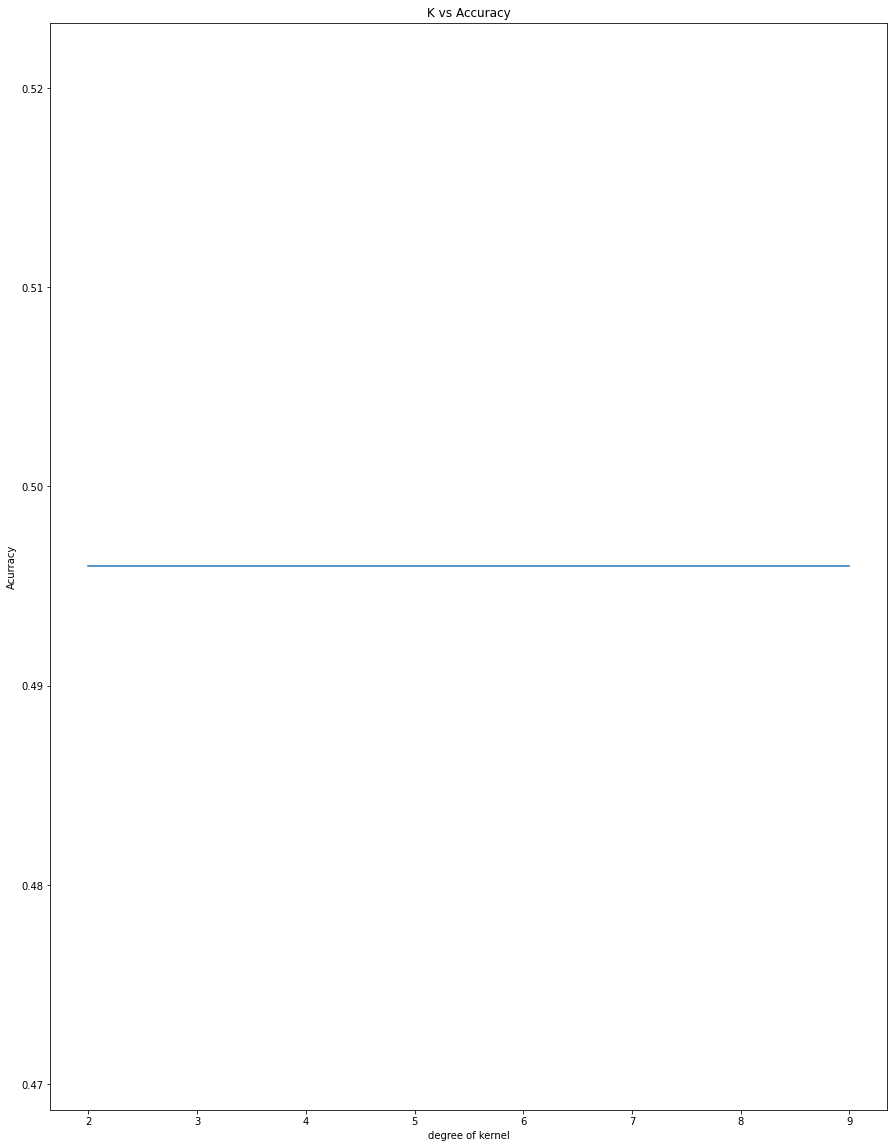

In [ ]:
from sklearn.svm import SVC

scores=[]
best_value_kerneldegree=0
max_accuracy=0
kerneldegree=[]

for i in range(2,10):
  SVMclassifier = SVC(gamma='auto',kernel="poly", degree=i)
  SVMclassifier.fit(X_train,y_train)
  class_predicted=SVMclassifier.predict(X_test)
  curr_accuracy=metrics.accuracy_score(y_test,class_predicted)
  scores.append(curr_accuracy)
  kerneldegree.append(i)
  if max_accuracy<curr_accuracy:
    best_value_kerneldegree=i
    max_accuracy=curr_accuracy

plt.figure(figsize=(15,20))
plt.plot(kerneldegree,scores)
plt.xlabel("degree of kernel")
plt.ylabel("Acurracy")
plt.title("K vs Accuracy")
print("Printing the accurracy, confusion matrix and classification report for best kernel degree value : ")
SVMclassifier = SVC(gamma='auto', kernel='poly', degree=best_value_kerneldegree)
SVMclassifier.fit(X_train,y_train)
print("Confusion matrix is : \n")
print(metrics.confusion_matrix(y_test,class_predicted))
print("\nClassification report is : \n")
print(metrics.classification_report(y_test, class_predicted))
print("\nAccuracy is : \n")
print(metrics.accuracy_score(y_test,class_predicted))

#SVM rbf kernels

In [ ]:
from sklearn.svm import SVC
SVMclassifier = SVC(gamma='auto')
SVMclassifier.fit(X_train,y_train)
class_predicted=SVMclassifier.predict(X_test)
print("Confusion matrix is : \n")
print(metrics.confusion_matrix(y_test,class_predicted))
print("\nClassification report is : \n")
print(metrics.classification_report(y_test, class_predicted))
print("\nAccuracy is : \n")
print(metrics.accuracy_score(y_test,class_predicted))

Confusion matrix is : 

[[1448   40]
 [ 896  616]]

Classification report is : 

              precision    recall  f1-score   support

 non-suicide       0.62      0.97      0.76      1488
     suicide       0.94      0.41      0.57      1512

    accuracy                           0.69      3000
   macro avg       0.78      0.69      0.66      3000
weighted avg       0.78      0.69      0.66      3000


Accuracy is : 

0.688



#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
count_vect=CountVectorizer()
X_matrix=count_vect.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_matrix,Y,test_size=0.3, random_state=42)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
class_predicted=clf.predict(X_test)
print("Confusion matrix is : \n")
print(metrics.confusion_matrix(y_test,class_predicted))
print("\nClassification report is : \n")
print(metrics.classification_report(y_test, class_predicted))
print("\nAccuracy is : \n")
print(metrics.accuracy_score(y_test,class_predicted))

Confusion matrix is : 

[[1392   96]
 [ 174 1338]]

Classification report is : 

              precision    recall  f1-score   support

 non-suicide       0.89      0.94      0.91      1488
     suicide       0.93      0.88      0.91      1512

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000


Accuracy is : 

0.91
